<a href="https://colab.research.google.com/github/dafnesilla/PDI_IB_ENE2025/blob/main/Practica_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

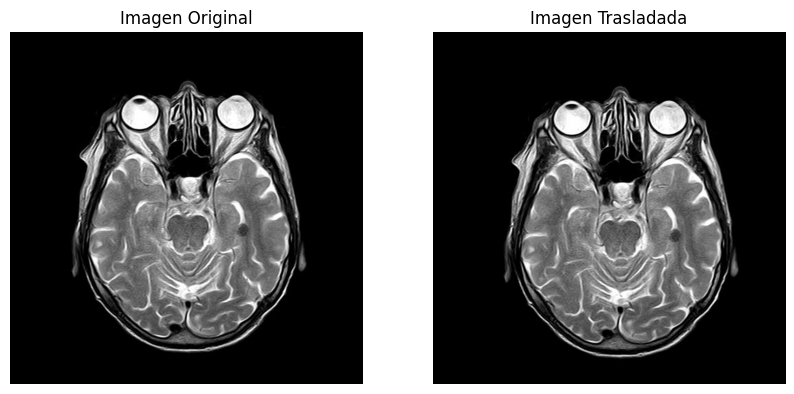

In [6]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


imagen = cv2.imread('/resonancia.jpg', cv2.IMREAD_GRAYSCALE)

alto, ancho = imagen.shape

# Definir la matriz de traslación (Mueve la imagen 50 px a la derecha y 30 px hacia abajo)
tx, ty = 50, 30  # Desplazamiento en X e Y
M = np.float32([[1, 0, tx], [0, 1, ty]])
imagen_trasladada = cv2.warpAffine(imagen, M, (ancho, alto))

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(imagen, cmap="gray")
plt.title("Imagen Original")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(imagen_trasladada, cmap="gray")
plt.title("Imagen Trasladada")
plt.axis("off")

plt.show()

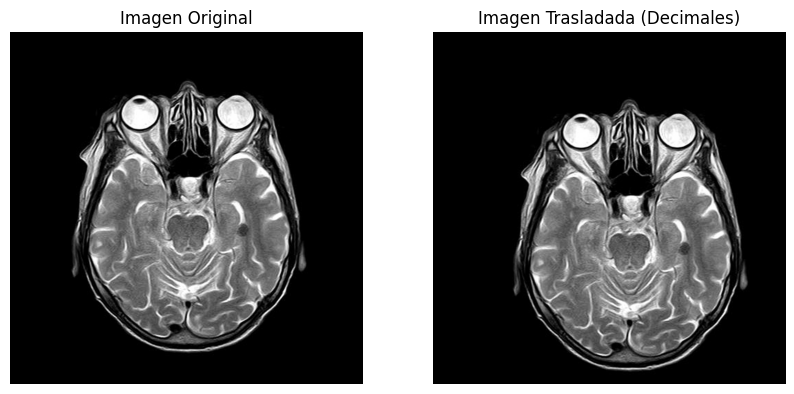

In [7]:
tx, ty = 100.5, 100.7  # Desplazamiento en X e Y con decimales
M = np.float32([[1, 0, tx], [0, 1, ty]])

# Aplicar la traslación con interpolación
imagen_trasladada = cv2.warpAffine(imagen, M, (ancho, alto), flags=cv2.INTER_LINEAR)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(imagen, cmap="gray")
plt.title("Imagen Original")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(imagen_trasladada, cmap="gray")
plt.title("Imagen Trasladada (Decimales)")
plt.axis("off")

plt.show()

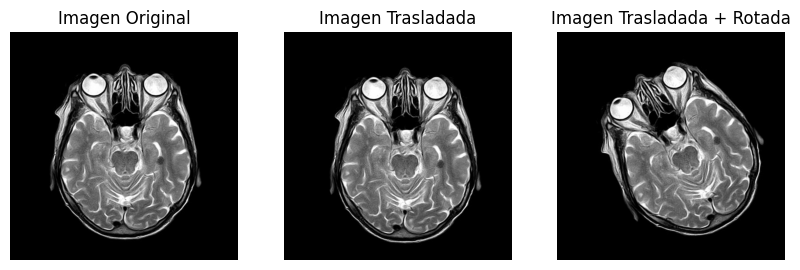

In [8]:
tx, ty = 50, 30
M_translacion = np.float32([[1, 0, tx], [0, 1, ty]])

# Aplicar traslación
imagen_trasladada = cv2.warpAffine(imagen, M_translacion, (ancho, alto))

angulo = 30
centro = (ancho // 2, alto // 2)  # Centro de la imagen
escala = 1.0  # Sin cambios en el tamaño

M_rotacion = cv2.getRotationMatrix2D(centro, angulo, escala)

# Aplicar rotación sobre la imagen trasladada
imagen_final = cv2.warpAffine(imagen_trasladada, M_rotacion, (ancho, alto))

plt.figure(figsize=(10, 5))
plt.subplot(1, 3, 1)
plt.imshow(imagen, cmap="gray")
plt.title("Imagen Original")
plt.axis("off")

plt.subplot(1, 3, 2)
plt.imshow(imagen_trasladada, cmap="gray")
plt.title("Imagen Trasladada")
plt.axis("off")

plt.subplot(1, 3, 3)
plt.imshow(imagen_final, cmap="gray")
plt.title("Imagen Trasladada + Rotada")
plt.axis("off")

plt.show()

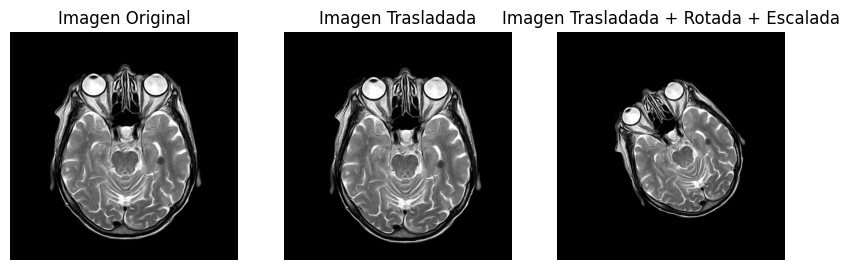

In [9]:
tx, ty = 50, 30
M_translacion = np.float32([[1, 0, tx], [0, 1, ty]])

# Aplicar traslación
imagen_trasladada = cv2.warpAffine(imagen, M_translacion, (ancho, alto))
angulo = 30
escala = 0.8
centro = (ancho // 2, alto // 2)  # Centro de la imagen

M_rotacion_escala = cv2.getRotationMatrix2D(centro, angulo, escala)

# Aplicar rotación y escalado
imagen_final = cv2.warpAffine(imagen_trasladada, M_rotacion_escala, (ancho, alto))

plt.figure(figsize=(10, 5))
plt.subplot(1, 3, 1)
plt.imshow(imagen, cmap="gray")
plt.title("Imagen Original")
plt.axis("off")

plt.subplot(1, 3, 2)
plt.imshow(imagen_trasladada, cmap="gray")
plt.title("Imagen Trasladada")
plt.axis("off")

plt.subplot(1, 3, 3)
plt.imshow(imagen_final, cmap="gray")
plt.title("Imagen Trasladada + Rotada + Escalada")
plt.axis("off")

plt.show()

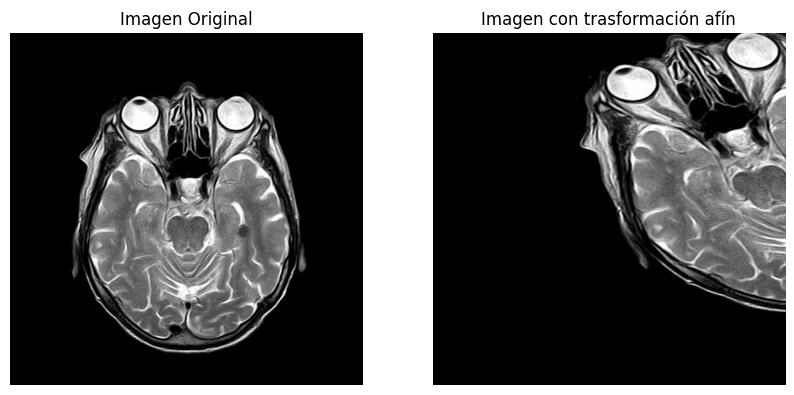

In [11]:
pts1 = np.float32([[50, 50], [200, 50], [50, 200]])

# Definir nuevos puntos transformados
pts2 = np.float32([[10, 100], [200, 50], [100, 250]])

# Obtener la matriz de transformación afín
M = cv2.getAffineTransform(pts1, pts2)

# Aplicar la transformación
filas, columnas = imagen.shape
imagen_transformada = cv2.warpAffine(imagen, M, (columnas, filas))

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(imagen, cmap="gray")
plt.title("Imagen Original")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(imagen_transformada, cmap="gray")
plt.title("Imagen con trasformación afín")
plt.axis("off")

plt.show()

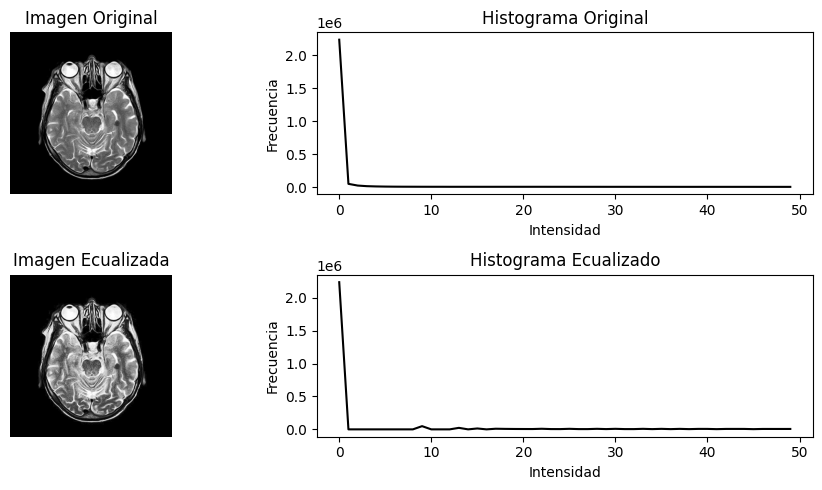

In [13]:
imagen_ecualizada = cv2.equalizeHist(imagen)

# Calcular histogramas antes y después
hist_original = cv2.calcHist([imagen], [0], None, [50], [0,50])
hist_ecualizada = cv2.calcHist([imagen_ecualizada], [0], None, [50], [0,50])

# Mostrar imágenes y histogramas
plt.figure(figsize=(10,5))

# Imagen Original
plt.subplot(2,2,1)
plt.imshow(imagen, cmap="gray")
plt.title("Imagen Original")
plt.axis("off")

# Histograma Original
plt.subplot(2,2,2)
plt.plot(hist_original, color="black")
plt.title("Histograma Original")
plt.xlabel("Intensidad")
plt.ylabel("Frecuencia")

# Imagen Ecualizada
plt.subplot(2,2,3)
plt.imshow(imagen_ecualizada, cmap="gray")
plt.title("Imagen Ecualizada")
plt.axis("off")

# Histograma Ecualizado
plt.subplot(2,2,4)
plt.plot(hist_ecualizada, color="black")
plt.title("Histograma Ecualizado")
plt.xlabel("Intensidad")
plt.ylabel("Frecuencia")

plt.tight_layout()
plt.show()